In [1]:
import torch

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

from model import Model
from custom_utils import load_diseases_data
from nets import Conv

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
train_images, train_labels, test_images, test_labels = load_diseases_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

(torch.Size([1894, 150, 100]),
 torch.Size([1894, 5, 2]),
 torch.Size([335, 150, 100]),
 torch.Size([335, 5, 2]))

In [4]:
net = Conv().to(device)
net

Conv(
  (conv): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (13): Flatten(start_dim=1, end_dim=-1)
  )
  (d1): Linear(in_features=1280, out_features=500, bias=True)
  (d2): Linear(in_features=500, out_features=200, bias=True)
  (d3): Linear(in_features=200, out_features=50, bias=True)
  (d4): Linear(in_features=50, out_features=10

In [5]:
disease_indxs = torch.unique(torch.where(train_labels[:, :, 1] == 1)[0])
disease_indxs.shape

torch.Size([1301])

In [6]:
model = Model(
    model=net, 
    train_input=train_images, #[disease_indxs], 
    train_label=train_labels, #[disease_indxs],
    test_input=test_images,
    test_label=test_labels
)

In [31]:

model.compile(
    optimizer=torch.optim.Adam, 
    lr=0.0001,
    loss=torch.nn.MSELoss()
)

In [32]:

model.train(
    epochs=100,
    batch_size=16
)

EPOCH [1/100], ====================> 100%, Loss = 7.472562629118329e-06, Accuracy = 100.0
Loss = 0.00018, Accuracy = 99.968%
Test loss = 0.01163, Test accuracy = 98.627%
EPOCH [2/100], ====================> 100%, Loss = 1.0710525202739518e-05, Accuracy = 100.0
Loss = 0.00015, Accuracy = 99.979%
Test loss = 0.01133, Test accuracy = 98.746%
EPOCH [3/100], ====================> 100%, Loss = 6.15553290117532e-06, Accuracy = 100.0
Loss = 0.00015, Accuracy = 99.979%
Test loss = 0.01184, Test accuracy = 98.746%
EPOCH [4/100], ====================> 100%, Loss = 1.2648213669308461e-05, Accuracy = 100.0
Loss = 0.00015, Accuracy = 99.968%
Test loss = 0.01191, Test accuracy = 98.687%
EPOCH [5/100], ====================> 100%, Loss = 3.4356347896391526e-05, Accuracy = 100.0
Loss = 0.00017, Accuracy = 99.968%
Test loss = 0.01213, Test accuracy = 98.687%
EPOCH [6/100], ====================> 100%, Loss = 1.9292294382466935e-05, Accuracy = 100.0
Loss = 0.00016, Accuracy = 99.968%
Test loss = 0.01212, T

In [9]:
torch.where(test_labels[:, 3, 1] == 1)

(tensor([  1,   3,   4,  42,  43, 119, 166, 205, 279, 281], device='cuda:0'),)

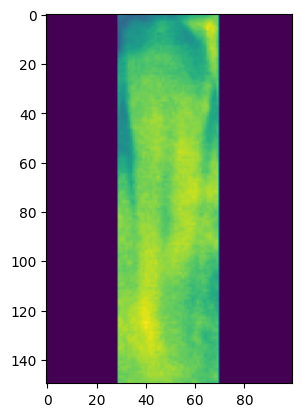

In [10]:
plt.imshow(test_images[2].cpu().numpy())

In [11]:
net(test_images[None, 2])

tensor([[[ 4.3809e-01,  5.4761e-01],
         [ 9.8564e-01,  2.3296e-02],
         [ 1.0308e+00, -7.0896e-03],
         [ 9.9896e-01, -9.1195e-04],
         [ 9.9711e-01, -4.6663e-03]]], device='cuda:0',
       grad_fn=<ReshapeAliasBackward0>)

<Figure size 640x480 with 0 Axes>

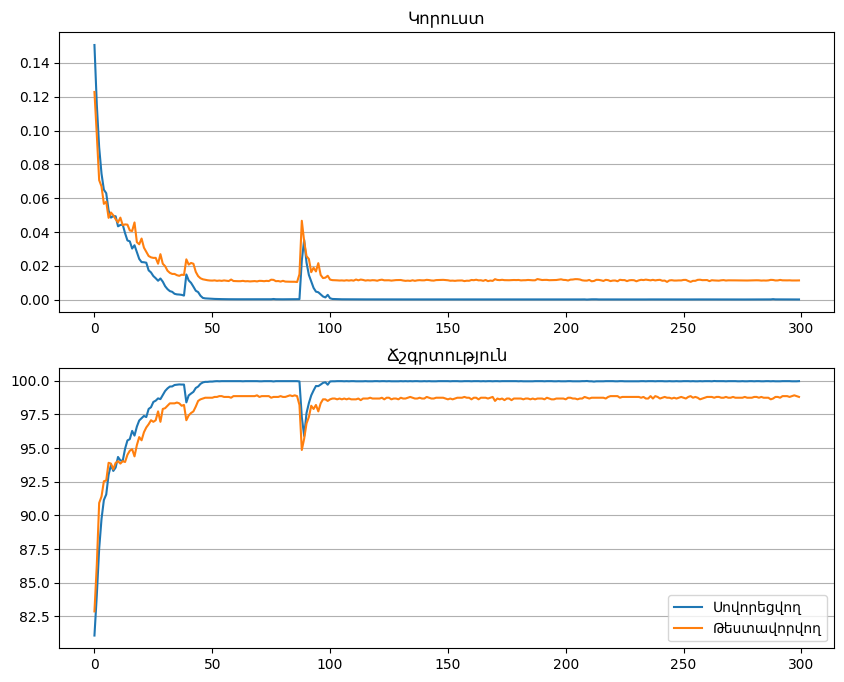

In [33]:
model.draw_plots()

In [34]:
# torch.save(net, '../models/disease_cnn.pt')

In [19]:
(train_labels[:, 0, 1] == 1).sum(), (train_labels[:, 1, 1] == 1).sum(), (train_labels[:, 2, 1] == 1).sum(), (train_labels[:, 3, 1] == 1).sum(), (train_labels[:, 4, 1] == 1).sum()

(tensor(554, device='cuda:0'),
 tensor(676, device='cuda:0'),
 tensor(121, device='cuda:0'),
 tensor(74, device='cuda:0'),
 tensor(260, device='cuda:0'))

In [20]:
(test_labels[:, 0, 1] == 1).sum(), (test_labels[:, 1, 1] == 1).sum(), (test_labels[:, 2, 1] == 1).sum(), (test_labels[:, 3, 1] == 1).sum(), (test_labels[:, 4, 1] == 1).sum()

(tensor(102, device='cuda:0'),
 tensor(120, device='cuda:0'),
 tensor(17, device='cuda:0'),
 tensor(10, device='cuda:0'),
 tensor(38, device='cuda:0'))

In [23]:
(train_labels.sum(axis=1)[:, 0] == 5).sum()

tensor(593, device='cuda:0')

In [26]:
(test_labels.sum(axis=1)[:, 0] == 5).sum()

tensor(106, device='cuda:0')

In [27]:
train_labels.size(0)

1894

In [28]:
test_labels.size(0)

335